## Arewa Data Science Academy
### Deep Learning Cohort2.0

#### Name: Hassan Muhammad Adam
#### Email: hassanmuhammadadam1@gmail.com
#### Title: Week 4 Solution

### Exercises Solution

Q1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is used in:

1. Healthcare: For medical imaging analysis and disease diagnosis.
2. Banking & Finance: For identity verification and fraud detection.
3. Agriculture: For monitoring crop health and detecting pests.

Q2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns too much from the training data, negatively impacting its performance on unseen data.



Q3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1. Regularization: Adds a penalty to the loss function to discourage complex models.
2. Cross-Validation: Splits the dataset into subsets for training and testing to ensure generalizability.
3. Early Stopping: Stops training when validation error increases to prevent learning noise.

4. Spend 20-minutes reading and clicking through the CNN Explainer website.


In [1]:
# Q5. Load the torchvision.datasets.MNIST() train and test datasets.


import torchvision
from torchvision import datasets

from torchvision import transforms

In [2]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor()) # do we want to transform the data as we download it?

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.66MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.87MB/s]


In [3]:
print("Length of the dataset:", len(train_data))
print("Shape of the dataset:", train_data.data.shape)


Length of the dataset: 60000
Shape of the dataset: torch.Size([60000, 28, 28])


In [4]:

img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [5]:
print(f"Image shape: {img.shape}")
class_names = train_data.classes
print(class_names)

Image shape: torch.Size([1, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


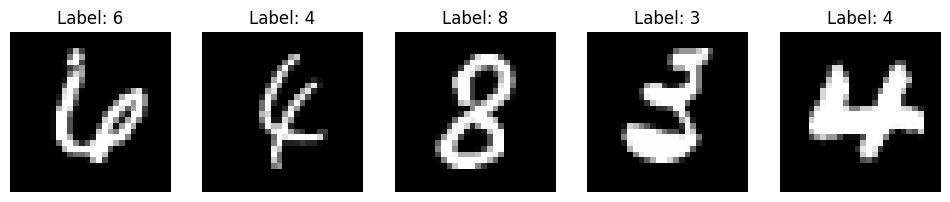

In [6]:
# Q6. Visualize at least 5 different samples of the MNIST training dataset.

import matplotlib.pyplot as plt
import numpy as np
# Define the number of samples to visualize
num_samples = 5

# Generate random indices for the samples
indices = np.random.randint(0, len(train_data), num_samples)

# Plot the samples
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

for i, index in enumerate(indices):
    img = train_data[index][0].squeeze().numpy()
    label = train_data[index][1]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()


In [7]:
import torch
from torch.utils.data import DataLoader
# Q7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

batch_size = 32

# Create dataloaders for train and test datasets
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print("the length of the train_dataloader is:", len(train_dataloader))
print("the length of the test_dataloader is:", len(test_dataloader))
for batch in train_dataloader:
    print(batch[0].shape, batch[1].shape)
    break

the length of the train_dataloader is: 1875
the length of the test_dataloader is: 313
torch.Size([32, 1, 28, 28]) torch.Size([32])


In [8]:
import torch
# Q8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

from torch import nn

from torch import nn
class MNIST_model(torch.nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x




In [9]:
model = MNIST_model(input_shape=1, hidden_units=32, output_shape=10)
print(model)

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)


In [10]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv_block_1.0.weight 	 torch.Size([32, 1, 3, 3])
conv_block_1.0.bias 	 torch.Size([32])
conv_block_1.2.weight 	 torch.Size([32, 32, 3, 3])
conv_block_1.2.bias 	 torch.Size([32])
conv_block_2.0.weight 	 torch.Size([32, 32, 3, 3])
conv_block_2.0.bias 	 torch.Size([32])
conv_block_2.2.weight 	 torch.Size([32, 32, 3, 3])
conv_block_2.2.bias 	 torch.Size([32])
classifier.1.weight 	 torch.Size([10, 1568])
classifier.1.bias 	 torch.Size([10])


In [11]:
# Q9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

import time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(input_shape=1, hidden_units=32, output_shape=10)
start_time = time.time()

fn_loss = nn.CrossEntropyLoss()
fn_optimizer = torch.optim.Adam(model_cpu.parameters(), lr=1e-3)


epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0.0
    model_cpu.train()
    for batch in train_dataloader:
        # Get the inputs and labels
        inputs, labels = batch

        # Zero the parameter gradients
        fn_optimizer.zero_grad()

        # Forward propagation
        outputs = model_cpu(inputs)

        # Calculate the loss
        loss = fn_loss(outputs, labels)

        # Backward propagation
        loss.backward()

        # Optimize the weights
        fn_optimizer.step()

        # Update the train loss
        train_loss += loss.item() * inputs.size(0)

    # Calculate the average losses
    train_loss = train_loss / len(train_dataloader.dataset)

    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1/5, Train Loss: 0.1411
Epoch: 2/5, Train Loss: 0.0465
Epoch: 3/5, Train Loss: 0.0340
Epoch: 4/5, Train Loss: 0.0266
Epoch: 5/5, Train Loss: 0.0209


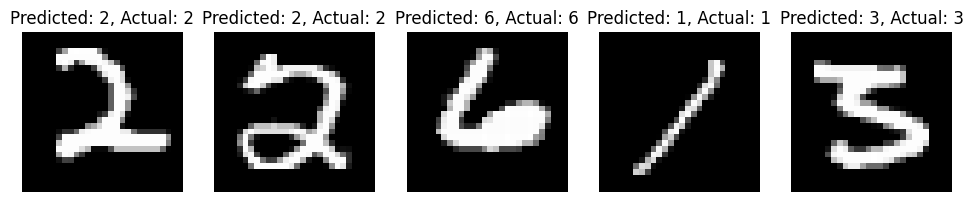

In [12]:
# Q10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

import matplotlib.pyplot as plt

# Set the model to evaluation mode
model_cpu.eval()

# Generate random indices for the samples
indices = np.random.randint(0, len(test_data), 5)

# Plot the samples and their predictions
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

for i, index in enumerate(indices):
    img = test_data[index][0].unsqueeze(0)
    label = test_data[index][1]

    # Forward propagation
    with torch.no_grad():
        output = model_cpu(img)
        _, predicted = torch.max(output, 1)

    img = img.squeeze().numpy()
    predicted = predicted.item()

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Predicted: {predicted}, Actual: {label}")
    axes[i].axis('off')

plt.show()


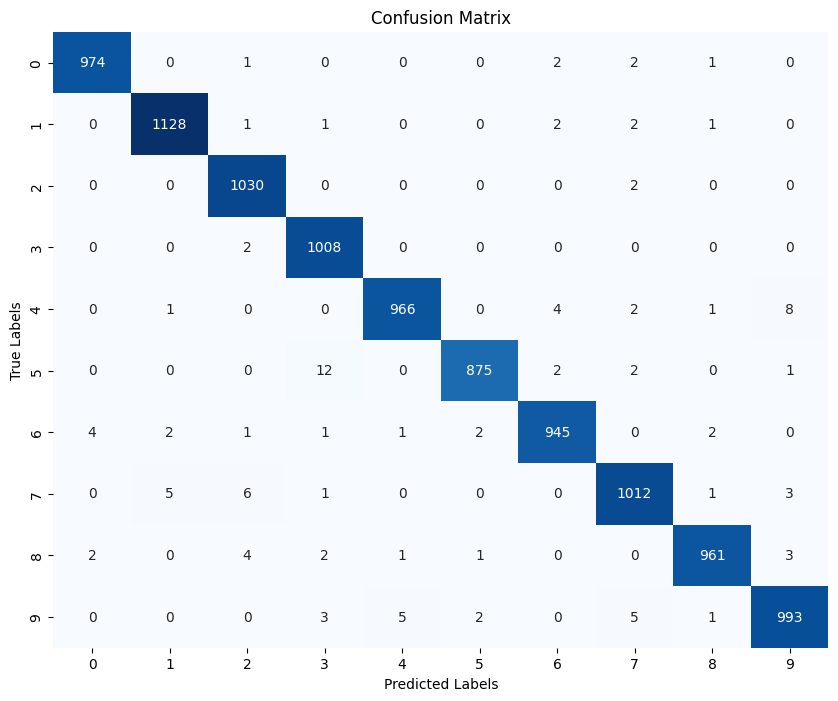

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the model to evaluation mode
model_cpu.eval()

# Create empty lists to store the predicted labels and true labels
predicted_labels = []
true_labels = []

# Iterate over the test dataloader to get the predicted labels and true labels
for batch in test_dataloader:
    inputs, labels = batch

    # Forward propagation
    with torch.no_grad():
        outputs = model_cpu(inputs)
        _, predicted = torch.max(outputs, 1)

    # Append the predicted labels and true labels to the lists
    predicted_labels.extend(predicted.tolist())
    true_labels.extend(labels.tolist())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
import torch
# Q12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

import torch.nn as nn

# Create a random tensor
input_tensor = torch.randn(1, 3, 64, 64)

# Create the Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

# Pass the input tensor through the Conv2d layer
output_tensor = conv_layer(input_tensor)
# Print the shape of input tensor
print('random tensor input shape:',input_tensor.shape)
# Print the shape of the output tensor
print('random tensor output shape:(with conv_layer)',output_tensor.shape)




random tensor input shape: torch.Size([1, 3, 64, 64])
random tensor output shape:(with conv_layer) torch.Size([1, 64, 32, 32])


# Q13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

faa

In [15]:
fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            train=True,
                                            download=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                             train=False,
                                             download=True,
                                             transform=transforms.ToTensor())

print("Length of the train dataset:", len(fashion_mnist_train))
print("Length of the test dataset:", len(fashion_mnist_test))



100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]

Length of the train dataset: 60000
Length of the test dataset: 10000


In [16]:
fashion_mnist_class_names = fashion_mnist_train.classes
print(fashion_mnist_class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [17]:
fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=False)

print("the length of the fashion_mnist_train_dataloader is:", len(fashion_mnist_train_dataloader))
print("the length of the fashion_mnist_test_dataloader is:", len(fashion_mnist_test_dataloader))
for batch in fashion_mnist_train_dataloader:
    print(batch[0].shape, batch[1].shape)
    break


the length of the fashion_mnist_train_dataloader is: 1875
the length of the fashion_mnist_test_dataloader is: 313
torch.Size([32, 1, 28, 28]) torch.Size([32])


In [18]:
model_fashion_mnist = MNIST_model(input_shape=1, hidden_units=32, output_shape=10)
print(model_fashion_mnist)

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)


In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fashion_mnist.parameters(), lr=1e-3)

In [28]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [31]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy


epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0.0
    train_acc = Accuracy(num_classes=len(fashion_mnist_class_names),task='MULTICLASS')
    model_fashion_mnist.train()
    for batch in fashion_mnist_train_dataloader:
        # Get the inputs and labels
        inputs, labels = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model_fashion_mnist(inputs)

        # Calculate the loss
        loss = loss_fn(outputs, labels)

        # Backward propagation
        loss.backward()

        # Optimize the weights
        optimizer.step()

        # Update the train loss
        train_loss += loss.item() * inputs.size(0)

        # Update the train accuracy
        train_acc.update(outputs, labels)

    # Calculate the average losses
    train_loss = train_loss / len(fashion_mnist_train_dataloader.dataset)

    # Calculate the train accuracy
    train_acc = train_acc.compute()

    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1/5, Train Loss: 0.1761, Train Accuracy: 0.9360
Epoch: 2/5, Train Loss: 0.1612, Train Accuracy: 0.9408
Epoch: 3/5, Train Loss: 0.1490, Train Accuracy: 0.9456
Epoch: 4/5, Train Loss: 0.1378, Train Accuracy: 0.9494
Epoch: 5/5, Train Loss: 0.1272, Train Accuracy: 0.9535


In [30]:
# Make predictions with trained model
test_preds = []
model_fashion_mnist.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_fashion_mnist(X_test)
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds)
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

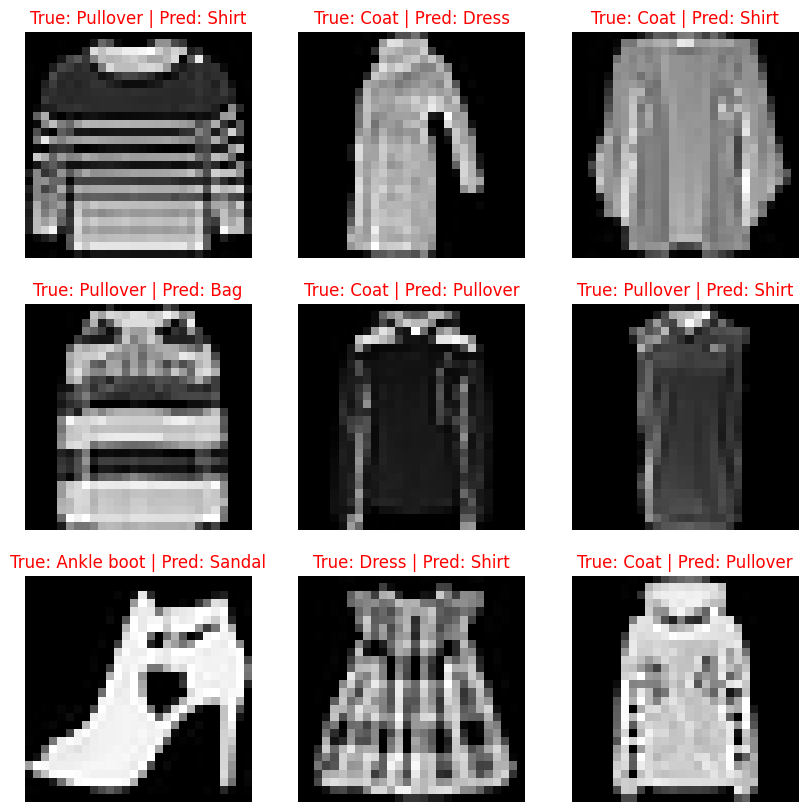

In [32]:
# plot some predictions where the model was wrong alongside what the label of the image should've been.

import random

wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]

random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);